# Импорты

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from tqdm import tqdm
from scipy.special import softmax, expit
import torch

# models
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# preproccessing
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, TargetEncoder

# metric
from sklearn.metrics import roc_auc_score

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка данных

In [2]:
data = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')

/var/folders/hk/5434dpv95nl2rxl497d7c0lm0000gn/T/ipykernel_6013/4218206482.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/train.csv')


In [3]:
data = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')

data['IsActiveMember'] = data['IsActiveMember'].astype(int)
data['HasCrCard'] = data['HasCrCard'].astype(int)

binaraiser = LabelBinarizer()
data['Gender'] = binaraiser.fit_transform(data['Gender'])
data_test['Gender'] = binaraiser.transform(data_test['Gender'])

targeter = TargetEncoder()
data['Surname'] = targeter.fit_transform(data['Surname'].values.reshape(
    (-1, 1)), data['Exited'].values.reshape((-1, 1)))
data_test['Surname'] = targeter.transform(
    data_test['Surname'].values.reshape((-1, 1)))

ohenc = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
data[['x0_France', 'x0_Germany', 'x0_Spain']] = ohenc.fit_transform(
    data['Geography'].values.reshape((-1, 1)))
data_test[['x0_France', 'x0_Germany', 'x0_Spain']] = ohenc.transform(
    data_test['Geography'].values.reshape((-1, 1)))

data['Geography'] = data['Geography'].map(
    {'France': 0, 'Spain': 1, 'Germany': 2})
data_test['Geography'] = data_test['Geography'].map(
    {'France': 0, 'Spain': 1, 'Germany': 2})

/var/folders/hk/5434dpv95nl2rxl497d7c0lm0000gn/T/ipykernel_6013/4265989800.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/train.csv')
/Users/artemon/.local/share/virtualenvs/Binary_Classification_4-1-VzDaJ6La/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Тест LightGBM

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(
    columns=['id', 'Exited', 'CustomerId', 'x0_France', 'x0_Germany', 'x0_Spain']), data['Exited'], test_size=0.2, random_state=42)

model = LGBMClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, probs)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988


0.8958405563479025

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(
    columns=['id', 'Exited', 'CustomerId', 'Geography']), data['Exited'], test_size=0.2, random_state=42)

model = LGBMClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, probs)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988


0.8959745139483792

Получаем, что OneHot клдирование работает немного лучше
Посмотрим на то, как алгоритм себя поведет в принципе не зная страны

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(
    columns=['id', 'Exited', 'CustomerId', 'Geography', 'x0_France', 'x0_Germany', 'x0_Spain']), data['Exited'], test_size=0.2, random_state=42)

model = LGBMClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, probs)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988


0.8875947160040369

Без знания региона качество падает

### CV тест

In [178]:
X = data.drop(columns=['id', 'CustomerId', 'Exited', 'Geography'])
y = data['Exited']
cv_folds = KFold(n_splits=10, shuffle=True, random_state=42)

l = []

for (train_index, test_index) in tqdm(cv_folds.split(X), total=10):
    X_train, y_train = X.iloc[train_index, :], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index, :], y.iloc[test_index]

    model = LGBMClassifier(n_estimators=200, max_depth=-1,
                           learning_rate=0.1, random_state=42, verbose=-1)
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    l.append(roc_auc_score(y_test, probs))

100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


In [182]:
np.array(l).mean()

0.8936344746714712

# Тест CatBoost

In [213]:
X = data.drop(columns=['id', 'Exited', 'CustomerId',
              'x0_France', 'x0_Germany', 'x0_Spain'])
y = data['Exited']
cv_folds = KFold(n_splits=10, shuffle=True, random_state=42)

l = []

for (train_index, test_index) in tqdm(cv_folds.split(X), total=10):
    X_train, y_train = X.iloc[train_index, :], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index, :], y.iloc[test_index]

    model = CatBoostClassifier(
        iterations=800, max_depth=3, random_seed=42, silent=True)
    model.fit(X_train, y_train, cat_features=[
              'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])
    probs = model.predict_proba(X_test)[:, 1]
    l.append(roc_auc_score(y_test, probs))

100%|██████████| 10/10 [04:20<00:00, 26.02s/it]


In [215]:
np.array(l).mean()

0.8938231982947282

# Random Forest тест

In [227]:
X = data.drop(columns=['id', 'Exited', 'CustomerId', 'Geography'])
y = data['Exited']
cv_folds = KFold(n_splits=10, shuffle=True, random_state=42)

l = []

for (train_index, test_index) in tqdm(cv_folds.split(X), total=10):
    X_train, y_train = X.iloc[train_index, :], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index, :], y.iloc[test_index]

    model = RandomForestClassifier(
        n_estimators=800, max_features='sqrt', n_jobs=-1)
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    l.append(roc_auc_score(y_test, probs))

100%|██████████| 10/10 [03:45<00:00, 22.53s/it]


In [228]:
np.array(l).mean()

0.8854292587945085

# XGBoost тест

In [301]:
X = data.drop(columns=['id', 'Exited', 'CustomerId', 'Geography'])
y = data['Exited']
cv_folds = KFold(n_splits=10, shuffle=True, random_state=42)

l = []

for (train_index, test_index) in tqdm(cv_folds.split(X), total=10):
    X_train, y_train = X.iloc[train_index, :], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index, :], y.iloc[test_index]

    model = XGBClassifier(n_estimators=250, learning_rate=0.05, random_state=42,
                          reg_lambda=0.2, reg_alpha=0.3, verbosity=0, n_jobs=-1)
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    l.append(roc_auc_score(y_test, probs))

100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


In [303]:
np.array(l).mean()

0.8933781546479184

# General model ensambling

In [308]:
X = data.drop(columns=['id', 'Exited', 'CustomerId'])
y = data['Exited']

In [330]:
expit(X.drop(columns=['Geography']) @ np.zeros((13, 3)))

,0,1,2
0,0.5,0.5,0.5
1,0.5,0.5,0.5
2,0.5,0.5,0.5
3,0.5,0.5,0.5
4,0.5,0.5,0.5
...,...,...,...
165029,0.5,0.5,0.5
165030,0.5,0.5,0.5
165031,0.5,0.5,0.5
165032,0.5,0.5,0.5


In [5]:
def get_model(cls, class_params, X, y, exclude, weights, train_index, n, offset, fit_params={}):
    X_train, y_train = X.drop(
        columns=exclude).iloc[train_index, :], y.iloc[train_index]

    l = []
    for model_number in range(n):
        m = cls(**class_params)
        m.fit(X_train, y_train,
              #   sample_weight=weights[train_index, offset + model_number],
              **fit_params)
        l.append(m)

    return l

In [6]:
def get_model_probas(model, X, exclude):
    X_real = X.drop(columns=exclude)
    return model.predict_proba(X_real)[:, 1]

In [7]:
def get_model_decision(model, X, exclude):
    X_real = X.drop(columns=exclude)
    return model.decision_function(X_real)[:, 1]

In [5]:
cv_auc_mean = []
cv_auc_xgboost = []

In [389]:
X = data.drop(columns=['id', 'Exited', 'CustomerId'])
y = data['Exited']
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

N = 1
n_lgbm = 35
n_xgb = 35
n_ctb = 30
n_rf = 0

# get alphas
# lgbm_alphas = np.zeros((13, n_lgbm))
# xgb_alphas = np.zeros((13, n_xgb))
# ctb_alphas = np.zeros((11, n_ctb))
# rf_alphas = np.zeros((13, n_rf))

# get betas
# lgbm_beta = 0
# xgb_beta = 0
# ctb_beta = 0
# rf_beta = 0

models_lgbm = []
models_xgb = []
models_ctb = []
models_rf = []

for batch_number, (train_index, test_index) in enumerate(tqdm(cv_folds.split(X), total=5, desc=f'main_cv')):
    for _ in tqdm(range(N), desc=f'ME-cycle'):
        models = []

        # g = np.hstack([expit(X.drop(columns=['Geography']) @ lgbm_alphas + lgbm_beta),
        #                        expit(X.drop(columns=['Geography'])
        #                              @ xgb_alphas + xgb_beta),
        #                        expit(X.drop(
        #                            columns=['x0_France', 'x0_Germany', 'x0_Spain']) @ ctb_alphas + ctb_beta),
        #                        expit(X.drop(columns=['Geography']) @ rf_alphas + rf_beta)])
        g = None

        # random_indexes = np.random.shuffle(glob_train_index)
        # m_index, e_index = random_indexes[:int(0.8 * len(random_indexes))], random_indexes[int(0.8 * len(random_indexes)):]

        # XGBoost block
        l = get_model(XGBClassifier,
                      {'n_estimators': 250, 'learning_rate': 0.05, 'random_state': batch_number,
                       'reg_lambda': 0.2, 'reg_alpha': 0.3, 'verbosity': 0, 'n_jobs': -1,
                       'subsample': 0.6},
                      X, y, ['Geography'], g, train_index, n_xgb, n_lgbm)
        models_xgb = l

        # lightgbm block
        l = get_model(LGBMClassifier,
                      {'n_estimators': 200, 'max_depth': -1, 'reg_alpha': 0.2, 'reg_lambda': 0.3,
                       'learning_rate': 0.1, 'random_state': batch_number, 'verbose': -1,
                       'n_jobs': None, 'subsample': 0.6, 'tree_method': 'hist'},
                      X, y, ['Geography'], g, train_index, n_lgbm, 0)
        models_lgbm = l

        # CatBoost block
        models_ctb = []
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 3, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      g, train_index, n_ctb//3, n_lgbm + n_xgb,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 5, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      g, train_index, n_ctb//3, n_lgbm + n_xgb,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 9, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      g, train_index, n_ctb//3, n_lgbm + n_xgb,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l

        # Random Forest block
        l = get_model(RandomForestClassifier,
                      {'n_estimators': 800, 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.6,
                       'n_jobs': -1, 'random_state': batch_number},
                      X, y, ['Geography'], g, train_index, n_rf, n_lgbm + n_xgb + n_ctb)
        models_rf = l

        # print([get_model_probas(m, X.iloc[test_index], ['Geography']) for m in models_lgbm])
        probs = np.mean(np.vstack([
            *[get_model_probas(m, X.iloc[test_index], ['Geography'])
              for m in models_lgbm],
            *[get_model_probas(m, X.iloc[test_index], ['Geography'])
              for m in models_xgb],
            *[get_model_probas(m, X.iloc[test_index], ['x0_France',
                               'x0_Germany', 'x0_Spain']) for m in models_ctb],
            *[get_model_probas(m, X.iloc[test_index], ['Geography'])
              for m in models_rf],
        ]), axis=0)

        cv_auc_mean.append(roc_auc_score(y.iloc[test_index], probs))

main_cv: 100%|██████████| 5/5 [53:21<00:00, 640.36s/it]


In [388]:
print('with random forest')
np.array(cv_auc_mean).mean()

with random forest


0.8935112837440717

In [390]:
print('without random forest')
np.array(cv_auc_mean).mean()

without random forest


0.8936130516893083

# Model Stacking

In [24]:
X = data.drop(columns=['id', 'Exited', 'CustomerId'])
y = data['Exited']
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

N = 1
n_lgbm = 35
n_xgb = 35
n_ctb = 30
n_rf = 0

cv_auc_stacking = []

# get alphas
# lgbm_alphas = np.zeros((13, n_lgbm))
# xgb_alphas = np.zeros((13, n_xgb))
# ctb_alphas = np.zeros((11, n_ctb))
# rf_alphas = np.zeros((13, n_rf))

# get betas
# lgbm_beta = 0
# xgb_beta = 0
# ctb_beta = 0
# rf_beta = 0

models_lgbm = []
models_xgb = []
models_ctb = []
models_rf = []

for batch_number, (train_index, test_index) in enumerate(tqdm(cv_folds.split(X), total=5, desc=f'main_cv')):
    for _ in tqdm(range(N), desc=f'ME-cycle'):
        models = []

        # g = np.hstack([expit(X.drop(columns=['Geography']) @ lgbm_alphas + lgbm_beta),
        #                        expit(X.drop(columns=['Geography'])
        #                              @ xgb_alphas + xgb_beta),
        #                        expit(X.drop(
        #                            columns=['x0_France', 'x0_Germany', 'x0_Spain']) @ ctb_alphas + ctb_beta),
        #                        expit(X.drop(columns=['Geography']) @ rf_alphas + rf_beta)])
        g = None

        np.random.shuffle(train_index)
        m_index, e_index = train_index[:int(
            0.8 * len(train_index))], train_index[int(0.8 * len(train_index)):]

        # XGBoost block
        l = get_model(XGBClassifier,
                      {'n_estimators': 250, 'learning_rate': 0.05, 'random_state': batch_number,
                       'reg_lambda': 0.2, 'reg_alpha': 0.3, 'verbosity': 0, 'n_jobs': -1,
                       'subsample': 0.6},
                      X, y, ['Geography'], g, m_index, n_xgb, n_lgbm)
        models_xgb = l

        # lightgbm block
        l = get_model(LGBMClassifier,
                      {'n_estimators': 200, 'max_depth': -1, 'reg_alpha': 0.2, 'reg_lambda': 0.3,
                       'learning_rate': 0.1, 'random_state': batch_number, 'verbose': -1,
                       'n_jobs': None, 'subsample': 0.6, 'tree_method': 'hist'},
                      X, y, ['Geography'], g, m_index, n_lgbm, 0)
        models_lgbm = l

        # CatBoost block
        models_ctb = []
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 3, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      g, m_index, n_ctb//3, n_lgbm + n_xgb,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 5, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      g, m_index, n_ctb//3, n_lgbm + n_xgb,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 9, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      g, m_index, n_ctb//3, n_lgbm + n_xgb,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l

        # Random Forest block
        l = get_model(RandomForestClassifier,
                      {'n_estimators': 800, 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.6,
                       'n_jobs': -1, 'random_state': batch_number},
                      X, y, ['Geography'], g, m_index, n_rf, n_lgbm + n_xgb + n_ctb)
        models_rf = l

        # E-step

        probs = np.vstack([
            *[get_model_probas(m, X.iloc[e_index], ['Geography'])
              for m in models_lgbm],
            *[get_model_probas(m, X.iloc[e_index], ['Geography'])
              for m in models_xgb],
            *[get_model_probas(m, X.iloc[e_index], ['x0_France',
                               'x0_Germany', 'x0_Spain']) for m in models_ctb],
            *[get_model_probas(m, X.iloc[e_index], ['Geography'])
              for m in models_rf],
        ])

        model_stack = LogisticRegression(n_jobs=-1)
        model_stack.fit(probs.T, y.iloc[e_index])

        # test

        probs = np.vstack([
            *[get_model_probas(m, X.iloc[test_index], ['Geography'])
              for m in models_lgbm],
            *[get_model_probas(m, X.iloc[test_index], ['Geography'])
              for m in models_xgb],
            *[get_model_probas(m, X.iloc[test_index], ['x0_France',
                               'x0_Germany', 'x0_Spain']) for m in models_ctb],
            *[get_model_probas(m, X.iloc[test_index], ['Geography'])
              for m in models_rf],
        ])

        answ = model_stack.predict_proba(probs.T)[:, 1]

        cv_auc_stacking.append(roc_auc_score(y.iloc[test_index], answ))

main_cv: 100%|██████████| 5/5 [53:16<00:00, 639.38s/it]


In [31]:
print('with post sgboost stacking')
np.array(cv_auc_stacking).mean()

with post sgboost stacking


0.8936935517613189

<Axes: >

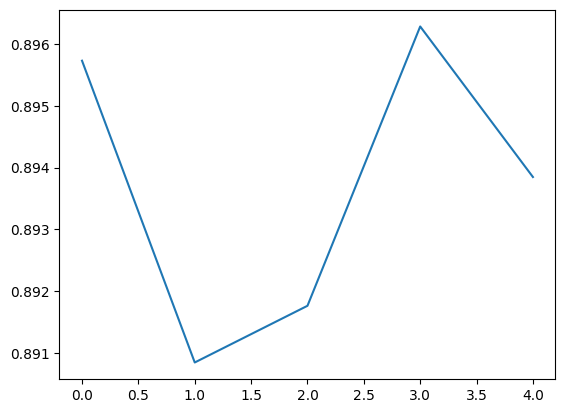

In [29]:
sns.lineplot(cv_auc_stacking)

# Mixture of Experts (ME алгоритм)

In [10]:
gamma = 1
lr = 0.1
n = 5
X = torch.tensor(data.drop(columns=[
                 'id', 'Exited', 'CustomerId', 'Geography']).to_numpy()[:10]).type(torch.float64)
y = torch.tensor(data['Exited'].astype(
    float).to_numpy()[:10]).type(torch.float64)
b = torch.tensor(probs[:5, :10]).type(torch.float64).T

alphas = torch.ones((n, 13))
betas = torch.ones((n, 1))

init_g = torch.exp(- betas *
                   torch.norm(alphas[:, :, None] - X.T[None, :, :], dim=1))
g = torch.exp(gamma * init_g).T
sum_g = torch.sum(g, dim=1)
sm = g / sum_g[:, None]

sigmoid = (1 - torch.sigmoid(-(y * 2 - 1) * torch.sum(sm * b, dim=1)))
model_weighted = (b / sum_g[:, None]) / \
    (torch.sum(b * g, dim=1) / sum_g)[:, None]

alpha_grad_coef = -torch.sum((y[:, None] * 2 - 1) * sigmoid[:, None]
                             * model_weighted * g, dim=0) * betas.T * gamma
alpha_grad = alpha_grad_coef.T * \
    torch.sum((X.T[None, :, :] - alphas[:, :, None]), dim=2)
alphas -= lr * alpha_grad

beta_grad_coef = -torch.sum((y[:, None] * 2 - 1) * sigmoid[:, None] * model_weighted *
                            g * torch.norm((X.T[None, :, :] - alphas[:, :, None]), dim=1).T ** 2, dim=0) * gamma
betas -= (lr * beta_grad_coef).reshape((-1, 1))

NameError: name 'probs' is not defined

In [494]:
X.T[None, :, :].shape, y.shape, b.shape

(torch.Size([1, 13, 10]), torch.Size([10]), torch.Size([10, 5]))

In [487]:
sm.shape

torch.Size([10, 5])

In [4]:
def get_model(cls, class_params, X, y, exclude, weights, train_index, n, offset, fit_params={}):
    X_train, y_train = X.drop(
        columns=exclude).iloc[train_index, :], y.iloc[train_index]
    l = []
    for model_number in range(n):
        m = cls(**class_params)
        m.fit(X_train, y_train,
              sample_weight=weights[:, offset + model_number],
              **fit_params)
        l.append(m)

    return l


def get_model_probas(model, X, exclude):
    X_real = X.drop(columns=exclude)
    return model.predict_proba(X_real)[:, 1]


def get_model_decision(model, X, exclude):
    X_real = X.drop(columns=exclude)
    return model.decision_function(X_real)[:, 1]

In [9]:
(alphas[:, :, None] * X_sampler.T[None, :, m_index]).shape

torch.Size([5, 13, 105621])

In [52]:
jjj = []

In [53]:
X = data.drop(columns=['id', 'Exited', 'CustomerId'])
y = data['Exited']

X_sampler = torch.tensor(
    X.drop(columns=['Geography']).to_numpy()).type(torch.float64)
y_sampler = torch.tensor(y.astype(
    float).to_numpy()).type(torch.float64)

cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

N = 5
E = 30
gamma = 1

n_lgbm = 5
n_xgb = 0
n_ctb = 0
n_rf = 0

lr = 0.1

models_lgbm = []
models_xgb = []
models_ctb = []
models_rf = []

cv_mean_em = []

for batch_number, (train_index, test_index) in enumerate(tqdm(cv_folds.split(X), total=5, desc=f'main_cv')):
    alphas = torch.ones((n_lgbm + n_xgb + n_ctb + n_rf, 13))
    betas = torch.ones((n_lgbm + n_xgb + n_ctb + n_rf, 1))

    for _ in tqdm(range(N), desc=f'ME-cycle', total=15):
        models_lgbm = []
        models_xgb = []
        models_ctb = []
        models_rf = []

        # getting subsamples
        np.random.shuffle(train_index)
        m_index, e_index = train_index[:int(
            0.8 * len(train_index))], train_index[int(0.8 * len(train_index)):]

        # getting weights of objevts
        init_g = torch.sigmoid(
            torch.sum(alphas[:, :, None] * X_sampler.T[None, :, m_index], dim=1) + betas)
        g = torch.exp(gamma * init_g).T
        sum_g = torch.sum(g, dim=1)
        sm = g / sum_g[:, None]

        # M-step

        # XGBoost block
        l = get_model(XGBClassifier,
                      {'n_estimators': 150, 'learning_rate': 0.05, 'random_state': batch_number,
                       'reg_lambda': 0.3, 'reg_alpha': 0.4, 'verbosity': 0, 'n_jobs': -1,
                       'subsample': 0.6},
                      X, y, ['Geography'], np.array(sm), m_index, n_xgb, 0,
                      )
        models_xgb = l

        # lightgbm block
        l = get_model(LGBMClassifier,
                      {'n_estimators': 5, 'max_depth': -1, 'reg_alpha': 0.2, 'reg_lambda': 0.3,
                       'learning_rate': 0.1, 'random_state': batch_number, 'verbose': -1,
                       'n_jobs': None, 'subsample': 0.6, 'tree_method': 'hist'},
                      X, y, ['Geography'], np.array(sm), m_index, n_lgbm, n_xgb)
        models_lgbm = l

        # CatBoost block
        models_ctb = []
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 3, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      np.array(sm), m_index, n_ctb//3, n_lgbm + n_xgb,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 5, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      np.array(sm), m_index, n_ctb//3, n_lgbm +
                      n_xgb + n_ctb//3,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l
        l = get_model(CatBoostClassifier,
                      {'iterations': 800, 'max_depth': 9, 'rsm': 0.6,
                          'random_seed': batch_number, 'silent': True, 'bootstrap_type': 'Bayesian',
                       },
                      X, y, ['x0_France', 'x0_Germany', 'x0_Spain'],
                      np.array(sm), m_index, n_ctb//3, n_lgbm +
                      n_xgb + (n_ctb//3) * 2,
                      fit_params={'cat_features': [
                          'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']})
        models_ctb += l

        # Random Forest block
        l = get_model(RandomForestClassifier,
                      {'n_estimators': 800, 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.6,
                       'n_jobs': -1, 'random_state': batch_number},
                      X, y, ['Geography'], np.array(sm), m_index, n_rf, n_lgbm + n_xgb + (n_ctb//3) * 3)
        models_rf = l

        # E-step

        b = torch.tensor(np.vstack([
            *[get_model_probas(m, X.iloc[e_index], ['Geography'])
              for m in models_lgbm],
            *[get_model_probas(m, X.iloc[e_index], ['Geography'])
              for m in models_xgb],
            *[get_model_probas(m, X.iloc[e_index], ['x0_France',
                               'x0_Germany', 'x0_Spain']) for m in models_ctb],
            *[get_model_probas(m, X.iloc[e_index], ['Geography'])
              for m in models_rf],
        ])).T

        delta = 100
        for _ in range(100):
            init_g = torch.sigmoid(
                torch.sum(alphas[:, :, None] * X_sampler.T[None, :, e_index], dim=1) + betas)
            g = torch.exp(gamma * init_g).T
            sum_g = torch.sum(g, dim=1)
            sm = g / sum_g[:, None]

            sigmoid = (
                1 - torch.sigmoid(-(y_sampler[e_index] * 2 - 1) * torch.sum(sm * b, dim=1)))
            model_weighted = (b / sum_g[:, None]) / \
                (torch.sum(b * g, dim=1) / sum_g)[:, None]

            alpha_grad = -torch.sum((((y_sampler[e_index, None] * 2 - 1) * sigmoid[:, None] *
                                      model_weighted * (init_g ** 2).T).T).reshape(5, -1, 1) * X_sampler[None, e_index, :], dim=1) * gamma + alphas
            alphas -= lr * alpha_grad

            beta_grad = -torch.sum((((y_sampler[e_index, None] * 2 - 1) * sigmoid[:, None] *
                                     model_weighted * (init_g ** 2).T).T).reshape(5, -1, 1), dim=1) * gamma
            betas -= (lr * beta_grad)

    # test
    init_g = torch.sigmoid(torch.sum(
        alphas[:, :, None] * X_sampler.T[None, :, test_index], dim=1) + betas)
    g = torch.exp(gamma * init_g).T
    sum_g = torch.sum(g, dim=1)
    sm = g / sum_g[:, None]

    b = torch.tensor(np.vstack([
        *[get_model_probas(m, X.iloc[test_index], ['Geography'])
          for m in models_lgbm],
        *[get_model_probas(m, X.iloc[test_index], ['Geography'])
          for m in models_xgb],
        *[get_model_probas(m, X.iloc[test_index], ['x0_France',
                                                   'x0_Germany', 'x0_Spain']) for m in models_ctb],
        *[get_model_probas(m, X.iloc[test_index], ['Geography'])
          for m in models_rf],
    ])).T
    answ = torch.sum(b * sm, dim=1)

    cv_mean_em.append(roc_auc_score(y.iloc[test_index], answ))

main_cv:   0%|          | 0/5 [00:00<?, ?it/s]

main_cv: 100%|██████████| 5/5 [00:30<00:00,  6.13s/it]


In [40]:
torch.sum((((y_sampler[e_index, None] * 2 - 1) * sigmoid[:, None] *
            model_weighted * (init_g ** 2).T).T).reshape(5, -1, 1), dim=1).shape

torch.Size([5, 1])

In [34]:
alphas.shape

torch.Size([5, 13])

In [54]:
np.array(jjj).mean()

0.21380945593315964

In [55]:
np.array(cv_mean_em).mean()

0.8810045826455543